## Examples with ```CopasiProcess``` using ``builder.Builder`` and ``biosimulator_processes.data_model``

In [1]:
import sys 

sys.path.insert(0, '..')

In [2]:
import os 
from process_bigraph import pp, pf 
from biosimulator_processes.data_model import *
from biosimulator_processes.biosimulator_builder import BiosimulatorBuilder

CobraProcess registered successfully.
CopasiProcess registered successfully.
SmoldynProcess registered successfully.
TelluriumProcess registered successfully.


#### Initialize a fresh instance of the `BiosimulatorBuilder`, which is inherently configured by `biosimulator_processes.CORE` in the top level.

In [3]:
b = BiosimulatorBuilder()

#### Example 1: Add a simple `CopasiProcess`-based composite to the bigraph, specifying parameter values through the `data_model`. For now, let's try loading a biomodel and adding a change to initial concentration of a species. We will then add another copasi process instance, whose model is this time loaded from a file (to demonstrate the data model)

Let's define a model instance from a file.

In [4]:
model_filepath = '../biosimulator_processes/model_files/BIOMD0000000061_url.xml'

os.path.exists(model_filepath)

True

In [5]:
# Uncomment if you wish to inspect the species referenced below
# model_from_file = load_model(model_filepath)
# get_species(model=model_from_file)

In [6]:
# 1. specify model changes (we know the model specs as we are providing the file. TODO: allow users to introspect the model before change)
process_model_changes = ModelChanges(
    species_changes=[SpeciesChanges(name='ADP', initial_concentration=2.1**3)]
)


pp(process_model_changes.model_dump())

{ 'global_parameter_changes': [],
  'reaction_changes': [],
  'species_changes': [ { 'expression': '',
                         'initial_concentration': 9.261000000000001,
                         'initial_expression': '',
                         'initial_particle_number': None,
                         'name': 'ADP',
                         'unit': ''}]}


In [7]:
# 2. define the model schema to be used by the composite process (one of the copasiprocess config parameters)

process_model_from_file = Model(
    model_id='copasi_process_from_file',
    model_source=model_filepath,
    model_name='Simple Composite Process from File',
    model_changes=process_model_changes
)


pp(process_model_from_file.model_dump())

{ 'model_changes': { 'global_parameter_changes': [],
                     'reaction_changes': [],
                     'species_changes': [ { 'expression': '',
                                            'initial_concentration': 9.261000000000001,
                                            'initial_expression': '',
                                            'initial_particle_number': None,
                                            'name': 'ADP',
                                            'unit': ''}]},
  'model_id': 'copasi_process_from_file',
  'model_language': 'sbml',
  'model_name': 'Simple Composite Process from File',
  'model_source': { 'value': '../biosimulator_processes/model_files/BIOMD0000000061_url.xml'},
  'model_units': None}


In [8]:
# 3. Define config schema to be used as 'config' parameter of Process constructor
process_config_from_file = CopasiProcessConfigSchema(
    method='stochastic',
    model=process_model_from_file,
    process_name='simple_copasi_from_file'
)


pp(process_config_from_file.model_dump())

{ 'method': 'stochastic',
  'model': { 'model_changes': { 'global_parameter_changes': [],
                                'reaction_changes': [],
                                'species_changes': [ { 'expression': '',
                                                       'initial_concentration': 9.261000000000001,
                                                       'initial_expression': '',
                                                       'initial_particle_number': None,
                                                       'name': 'ADP',
                                                       'unit': ''}]},
             'model_id': 'copasi_process_from_file',
             'model_language': 'sbml',
             'model_name': 'Simple Composite Process from File',
             'model_source': { 'value': '../biosimulator_processes/model_files/BIOMD0000000061_url.xml'},
             'model_units': None},
  'process_name': 'simple_copasi_from_file'}


In [9]:
process_config_from_file.model

{'model_id': 'copasi_process_from_file',
 'model_source': {'value': '../biosimulator_processes/model_files/BIOMD0000000061_url.xml'},
 'model_language': 'sbml',
 'model_name': 'Simple Composite Process from File',
 'model_changes': {'species_changes': [{'name': 'ADP',
    'unit': '',
    'initial_concentration': 9.261000000000001,
    'initial_particle_number': None,
    'initial_expression': '',
    'expression': ''}],
  'global_parameter_changes': [],
  'reaction_changes': []},
 'model_units': None}

In [10]:
# 4. Add the process instance by the name of 'simple_copasi' to the builder


b[process_config_from_file.process_name].add_process(
    name='CopasiProcess',
    model=process_config_from_file.model,
    method=process_config_from_file.method
)

Let's now add a biomodel with adjusted params (we know ahead of time)

In [11]:
# Uncomment if you wish to introspect the model referred below
# from basico import *
# from basico import biomodels
# 
# 
# biomodel_id = 'BIOMD0000000861'
# biomodel = load_biomodel(biomodel_id)
# get_species(model=biomodel)

In [12]:
# reaction_names = get_reactions(model=biomodel)
# 
# reaction_names

In [13]:
rparam = ReactionParameter(
    parameter_name='EpoRpRJAK2',
    value=21312.2
)

rparam2 = ReactionParameter(
    parameter_name='EpoRJAK2',
    value=21312.2
)

rc1 = ReactionChanges(
    reaction_name='reaction_1',
    parameter_changes=[rparam, rparam2]
)

rc2 = ReactionChanges(
    reaction_name='reaction_11',
    reaction_scheme='A + B -> C'
)

In [14]:
biomodel_process_changes = ModelChanges(
    reaction_changes=[rc1, rc2]
)

In [15]:
pp(biomodel_process_changes.model_dump())

{ 'global_parameter_changes': [],
  'reaction_changes': [ { 'parameter_changes': [ { 'parameter_name': 'EpoRpRJAK2',
                                                   'value': 21312.2},
                                                 { 'parameter_name': 'EpoRJAK2',
                                                   'value': 21312.2}],
                          'reaction_name': 'reaction_1',
                          'reaction_scheme': None},
                        { 'parameter_changes': [],
                          'reaction_name': 'reaction_11',
                          'reaction_scheme': 'A + B -> C'}],
  'species_changes': []}


In [16]:
biomodel_id = 'BIOMD0000000861'


biomodel_process_model = Model(
    model_id=biomodel_id,
    model_source=biomodel_id,
    model_name='composite_from_biomodel',
    model_changes=biomodel_process_changes
)

pp(biomodel_process_model.model_dump())

{ 'model_changes': { 'global_parameter_changes': [],
                     'reaction_changes': [ { 'parameter_changes': [ { 'parameter_name': 'EpoRpRJAK2',
                                                                      'value': 21312.2},
                                                                    { 'parameter_name': 'EpoRJAK2',
                                                                      'value': 21312.2}],
                                             'reaction_name': 'reaction_1',
                                             'reaction_scheme': None},
                                           { 'parameter_changes': [],
                                             'reaction_name': 'reaction_11',
                                             'reaction_scheme': 'A + B -> C'}],
                     'species_changes': []},
  'model_id': 'BIOMD0000000861',
  'model_language': 'sbml',
  'model_name': 'composite_from_biomodel',
  'model_source': {'value': 'BIOMD000000086

In [17]:
biomodel_process_config = CopasiProcessConfigSchema(
    process_name='copasi_process_from_biomodel',
    method='directMethod',
    model=biomodel_process_model
)


pp(biomodel_process_config.model_dump())

{ 'method': 'directMethod',
  'model': { 'model_changes': { 'global_parameter_changes': [],
                                'reaction_changes': [ { 'parameter_changes': [ { 'parameter_name': 'EpoRpRJAK2',
                                                                                 'value': 21312.2},
                                                                               { 'parameter_name': 'EpoRJAK2',
                                                                                 'value': 21312.2}],
                                                        'reaction_name': 'reaction_1',
                                                        'reaction_scheme': None},
                                                      { 'parameter_changes': [],
                                                        'reaction_name': 'reaction_11',
                                                        'reaction_scheme': 'A '
                                                                 

Add the biomodel config to the bigraph

In [18]:
b[biomodel_process_config.process_name].add_process(
    name='CopasiProcess',
    model=biomodel_process_config.model,
    method=biomodel_process_config.method
)

Visualize the added processes

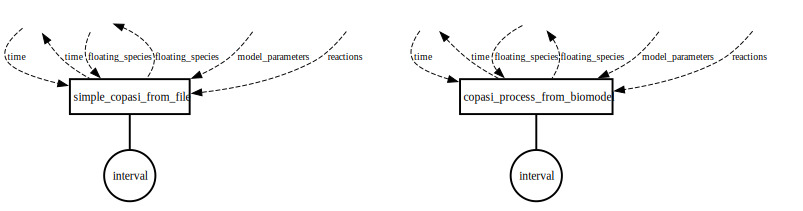

In [19]:
b.visualize()

Connect the processes together with the default store name:

In [20]:
b.connect_all(append_to_store_name='_store')

b

Builder({ 'copasi_process_from_biomodel': { '_type': 'process',
                                    'address': 'local:CopasiProcess',
                                    'config': { 'method': 'directMethod',
                                                'model': { 'model_changes': { 'global_parameter_changes': [ ],
                                                                              'reaction_changes': [ { 'parameter_changes': [ { 'parameter_name': 'EpoRpRJAK2',
                                                                                                                               'value': 21312.2},
                                                                                                                             { 'parameter_name': 'EpoRJAK2',
                                                                                                                               'value': 21312.2}],
                                                                        